<a href="https://colab.research.google.com/github/kmrasmussen/cell_project/blob/main/Section_2_2_IMMUNE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import torch.nn.functional as F
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
X = np.load('/content/gdrive/My Drive/uni_archive/cell/immune_control_subsampled_alone.npy')

In [ ]:
pca = PCA(n_components=20)
pca.fit(X)
print('Explained variance ratios', pca.explained_variance_ratio_)
print('Explained variance by 2D', pca.explained_variance_ratio_[:2].sum())
X_pca = pca.transform(X)

Explained variance ratios [5.5850554e-01 3.6542737e-01 3.5301287e-02 1.6329695e-02 4.1106222e-03
 2.6323223e-03 2.5918081e-03 1.5429870e-03 1.1329027e-03 1.0267891e-03
 7.0413295e-04 5.4367620e-04 4.4349086e-04 3.9486348e-04 3.8008176e-04
 3.4228485e-04 3.3162013e-04 3.0946519e-04 2.5750653e-04 2.3688696e-04]
Explained variance by 2D 0.9239329


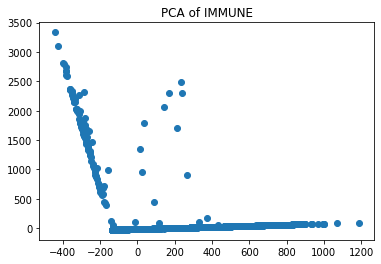

In [ ]:
plt.title('PCA of IMMUNE')
plt.scatter(X_pca[:,0], X_pca[:,1])
#plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp.1.2.2.immune_pca.png')

In [ ]:
umap_ = umap.UMAP()
X_umap = umap_.fit_transform(X)

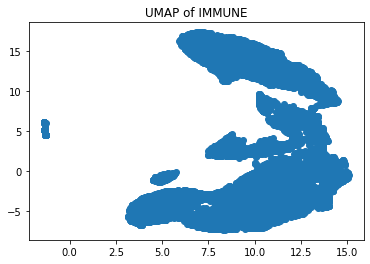

In [ ]:
plt.title('UMAP of IMMUNE')
plt.scatter(X_umap[:,0], X_umap[:,1])
#plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp.1.2.2.immune_umap.png')

In [ ]:
np.median(X.sum(axis = 1))

242.0

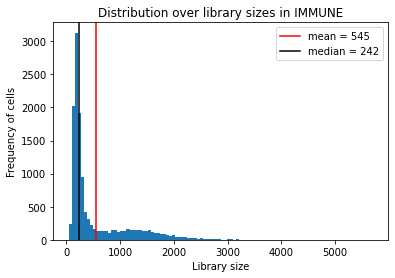

In [ ]:
plt.hist(X.sum(axis = 1), bins = 100)
plt.axvline(x = X.sum(axis = 1).mean(), color = 'red', label = 'mean = ' + str(int(X.sum(axis = 1).mean())))
plt.axvline(x = np.median(X.sum(axis = 1)), color = 'black', label = 'median = ' + str(int(np.median(X.sum(axis = 1)))))
plt.legend()
plt.title('Distribution over library sizes in IMMUNE')
plt.xlabel('Library size')
plt.ylabel('Frequency of cells')
#plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp.1.2.2.immune_library_sizes.png')

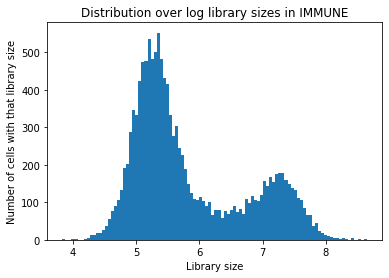

In [ ]:
plt.hist(np.log(X.sum(axis = 1)), bins = 100)
plt.title('Distribution over log library sizes in IMMUNE')
plt.xlabel('Library size')
plt.ylabel('Number of cells with that library size')
#plt.axvline(x = np.log(X.sum(axis = 1)).mean(), color = 'red', label = 'mean = ' + str(int(np.log(X.sum(axis = 1)).mean())))
plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp.1.2.2.immune_log_library_sizes.png')

# Normalization

In [ ]:
X_norm = F.normalize(input = torch.tensor(X), p = 1.)

In [ ]:
X_lognorm = torch.log(X_norm * 10000 + 1)

In [ ]:
pca = PCA(n_components=20)
pca.fit(X_lognorm)
print('Explained variance ratios', pca.explained_variance_ratio_)
print('Explained variance by 2D', pca.explained_variance_ratio_[:2].sum())
X_pca = pca.transform(X_lognorm)

Explained variance ratios [0.08706415 0.01969838 0.01723197 0.01101777 0.00778753 0.00669713
 0.00608273 0.00406232 0.00369369 0.00351749 0.00341003 0.00321706
 0.00302534 0.00283211 0.00274516 0.00263535 0.00257595 0.00255791
 0.00248913 0.00246559]
Explained variance by 2D 0.10676253222174512


In [ ]:
umap_ = umap.UMAP()
X_umap = umap_.fit_transform(X_pca)

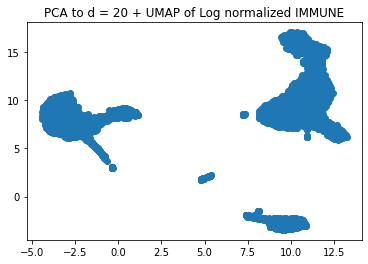

In [ ]:
plt.title('PCA to d = 20 + UMAP of Log normalized IMMUNE')
plt.scatter(X_umap[:,0], X_umap[:,1])
plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp.1.2.2.lognorm_umap.png')

# Looking at genes

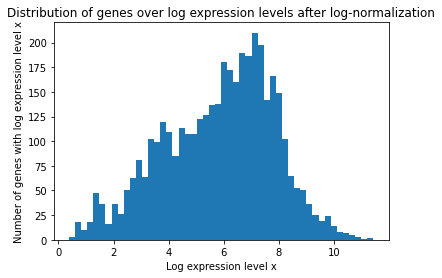

In [ ]:
plt.title('Distribution of genes over log expression levels after log-normalization')
plt.xlabel('Log expression level x')
plt.ylabel('Number of genes with log expression level x')
plt.hist(np.log(X_lognorm.sum(axis = 0)), bins=50)
plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp.1.2.2.lognorm_expression_levels.png')